In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def make_pdf(data, nbins):
    data = sorted(data)
    increment = data[-1]/nbins
    binNum = 0
    pdf = np.array([0] * (nbins + 1)) #due to float percision sometimes you need one extra bin
    midpoints = []
    
    
    i = 0
    while i < len(data):
        #if data[i] == 0:
         #   print('woah zero')
        if data[i] <= (binNum + 1)* increment:
            pdf[binNum] += 1
            i += 1
        else:
            midpoints.append(((binNum * increment) + ((binNum + 1) * increment))/2)
            binNum += 1
        
    midpoints.append(((binNum * increment) + ((binNum + 1) * increment))/2) # have to do one more time outside loop
    
    #recombine the extra bin
    
    pdf[-2] += pdf[-1]
    
    pdf = pdf[0:-1]
    
    return midpoints, pdf/len(data)

def make_cdf(data, nbins):
    midpoints, pdf = make_pdf(data, nbins)
    
    cdf = []
    sum = 0
    for p in pdf:
        cdf.append(sum + p)
        sum += p
    
    return midpoints,cdf
    
    


def scale(data, has_label=True):
    if has_label:
        
        y = np.array([data[:,-1]]).T
        d = data[:,0:-1]
        print(y.T.shape,d.shape)
        d = d - d.min(axis=0)
        d = d / (d.max(axis=0) + .000000001) #hack to avoid division by 0
        
        return np.hstack((d,y))
    else:
        assert "NOT IMPLEMENTED" == ''

    

(1, 148) (148, 4)
0.06586561385098136 49
0.07397680438956333 50
0.0944267984806793 49


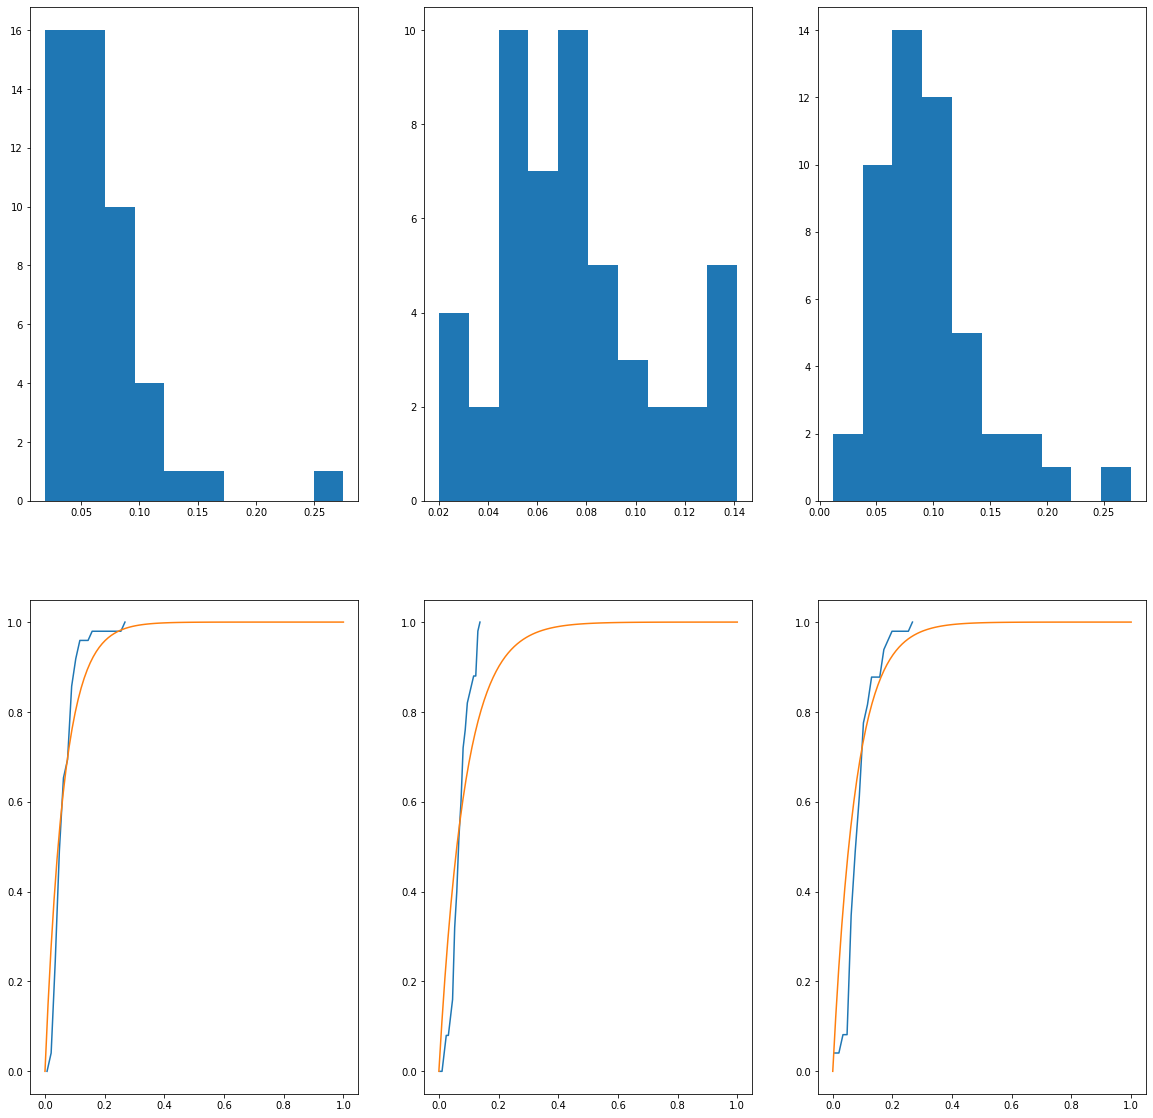

In [3]:


###IRIS TESTS


iris = np.genfromtxt("data/iris.txt",delimiter=None)

iris = scale(iris)


group0 = np.array([x for x in iris if x[-1] == 0 ])
group1 = np.array([x for x in iris if x[-1] == 1 ])
group2 = np.array([x for x in iris if x[-1] == 2 ])

groups = [group0, group1, group2]
betas = [ 0.063125, 0.0867931 ,0.0770245]#precalculated from professor waynes openlab code


sp = np.linspace(0, 1, 100)

fi, ax = plt.subplots(2,3, figsize=(20,20))
for num, group in enumerate(groups):
    KNN_model = KNeighborsClassifier(n_neighbors=2)

    x0 = group[:,0:-1]
    y0 = group[:,-1]

    KNN_model.fit(x0, y0)

    distances = []

    with open(f'data/iris{num}dist.txt', 'w') as f:
        for pt in x0:
            dist, neighs = KNN_model.kneighbors([pt])
            distances.append(dist[0][1])
            f.write(f'{dist[0][1]}\n')

    print(np.mean(distances), len(distances))

    ax[0][num].hist(distances)
    x, y = make_cdf(distances, 20)
    ax[1][num].plot(x, y)
    ax[1][num].plot(sp, 1 - np.exp(-1/betas[num] * sp))






(1, 1599) (1599, 11)
0.2735724327300527 53
0.10397873683605682 681
0.11082721911190906 638
0.11823143124256377 199


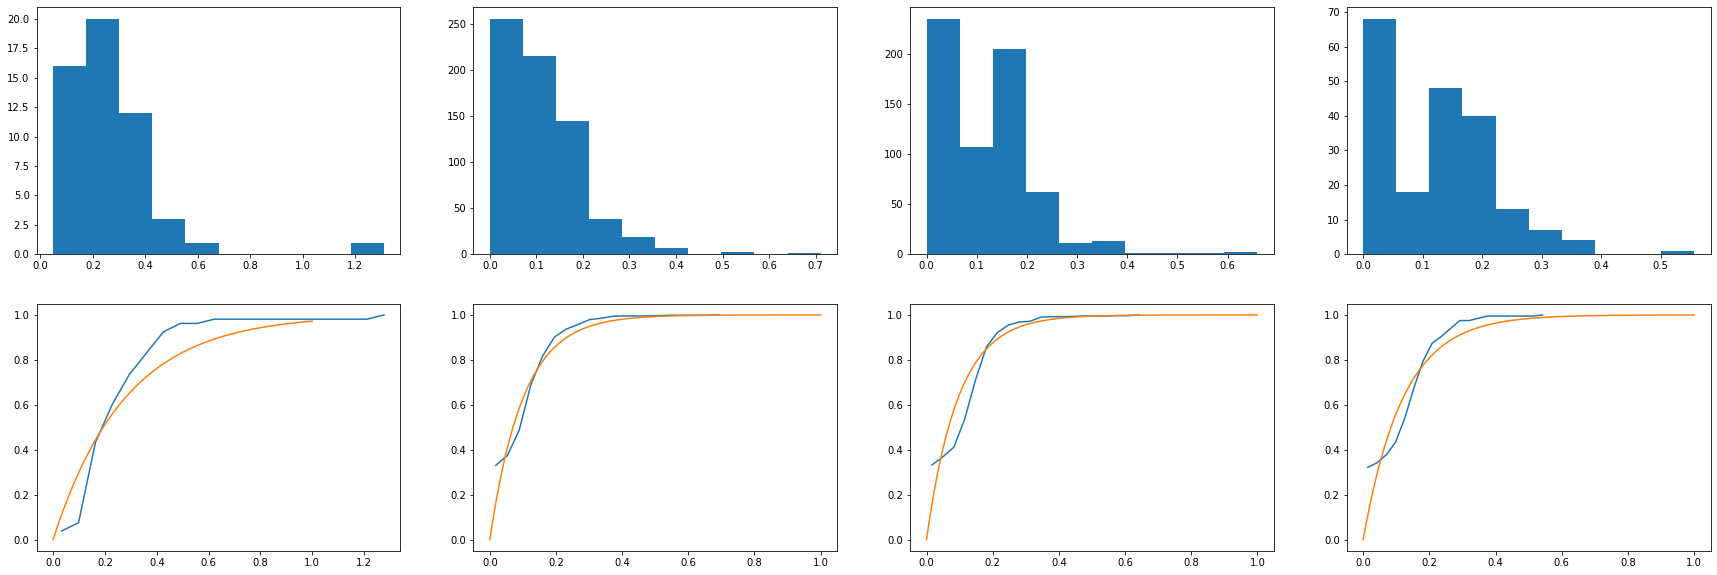

In [4]:
###wines


wines = np.genfromtxt("data/winequality-red.txt",delimiter=';')
wines=wines[1:]
wines = scale(wines)


group0 = np.array([x for x in wines if x[-1] == 4 ])
group1 = np.array([x for x in wines if x[-1] == 5 ])
group2 = np.array([x for x in wines if x[-1] == 6 ])
group3 = np.array([x for x in wines if x[-1] == 7 ])

groups = [group0, group1, group2, group3]
betas = [ 0.278917, 0.101087 ,0.0958736,  0.120915]#precalculated from professor waynes openlab code


sp = np.linspace(0, 1, 100)
biggersp = np.linspace(0, 10, 100)

fi, ax = plt.subplots(2,4, figsize=(30,10))
for num, group in enumerate(groups):
    KNN_model = KNeighborsClassifier(n_neighbors=2)

    x0 = group[:,0:-1]
    y0 = group[:,-1]

    KNN_model.fit(x0, y0)

    distances = []


    with open(f'data/wine{num}dist.txt', 'w') as f:
        for pt in x0:
            dist, neighs = KNN_model.kneighbors([pt])
            distances.append(dist[0][1])
            f.write(f'{dist[0][1]}\n')
            
    print(np.mean(distances), len(distances))

    ax[0][num].hist(distances)
    x, y = make_cdf(distances, 20)
    ax[1][num].plot(x, y)
    ax[1][num].plot(sp, 1 -np.exp(-1/betas[num] * sp))


#print(biggersp)
#plt.plot(biggersp, np.exp(biggersp))


